# Unit 2 Project

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
#Read in data from source 
df_raw = pd.read_csv("admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


### Question 1. How many observations are in our dataset?

In [47]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

### Question 2. Create a summary table

In [4]:
df_raw.describe()

//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


### Question 3. Why would GRE have a larger STD than GPA?

Because the majority of deviations are far from the mean for GRE.

### Question 4. Drop data points with missing data

In [5]:
print df_raw.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64


In [6]:
df_new = df_raw.dropna()

### Question 5. Confirm that you dropped the correct data. How can you tell?

In [7]:
print df_new.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64


### Question 6. Create box plots for GRE and GPA

(200, 900)

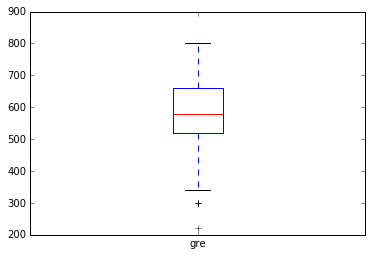

In [11]:
#boxplot 1
boxplot_gre = df_new['gre'].plot(kind = "box")
boxplot_gre.set_ylim(200, 900)

(2.0, 4.5)

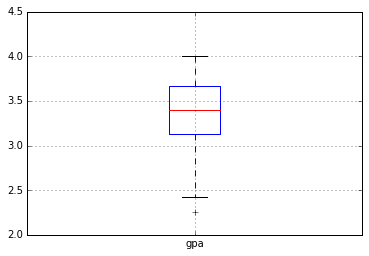

In [9]:
#boxplot 2
boxplot_gpa = df_new.boxplot(column = "gpa", return_type = 'axes')
boxplot_gpa.set_ylim(2.0, 4.5)

### Question 7. What do these plots show?

GRE has two outliers below the mean and GPA has one outlier below the mean. Both plots seem skewed to the right.

### Question 8. Describe each distribution

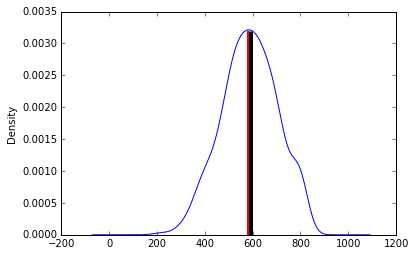

In [27]:
df_new['gre'].plot(kind='density')

plt.vlines(df_new['gre'].mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.0032,
           linewidth=5.0)

plt.vlines(df_new['gre'].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.0032, 
           linewidth=2.0,
           color="red")

In [39]:
#check for skewness
df_new["gre"].skew()

-0.146046988215597

In [38]:
#check for kurtosis
df_new['gre'].kurt()

-0.33286435465143427

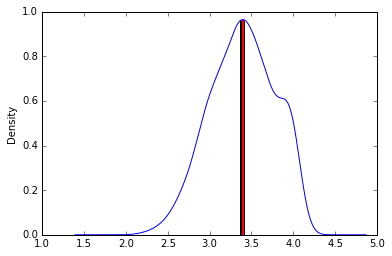

In [36]:
df_new['gpa'].plot(kind='density')

plt.vlines(df_new['gpa'].mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.964,
           linewidth=5.0)

plt.vlines(df_new['gpa'].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.964, 
           linewidth=2.0,
           color="red")

In [40]:
#check for skewness
df_new["gpa"].skew()

-0.21688893296924305

In [41]:
#check for kurtosis
df_new["gpa"].kurt()

-0.56356989952216807

### Question 9. If our model had an assumption of a normal distribution would we meet that requirement?¶

Both GPA and GRE have slightly negative skewness and negative kurtosis. We have a skewed distribution.

### Question 10. Does this distribution need correction? If so, why? How?

We can use the log function to normalize the distribution.

### Question 11. Which of our variables are potentially colinear?

In [44]:
# create a correlation matrix for the data
df_new.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


### Question 12. What did you find?


There is no co-linearity among these variables.

### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of undergraduate schools.

null hypothesis: There is no relationship between prestige and grad school admission rates (and thus β1 equals zero)

alternative hypothesis: There is a relationship between prestige and grad school admission rates (and thus β1 is not equal to zero)

In [48]:
import statsmodels.formula.api as smf

In [56]:
lm = smf.ols(formula='admit ~ prestige ', data=df_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     24.91
Date:                Wed, 03 Aug 2016   Prob (F-statistic):           9.02e-07
Time:                        09:33:26   Log-Likelihood:                -247.58
No. Observations:                 397   AIC:                             499.2
Df Residuals:                     395   BIC:                             507.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.6157      0.064      9.630      0.000         0.490     0.741
prestige      -0.1199      0.024     -4.991      0.000        -0.167    -0.073
==============================================================================
Omnibus:                      289.617   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.484
Skew:                           0.718   Prob(JB):                     2.00e-13
Kurtosis:                       1.785   Cond. No.                         8.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0 is not the 95% confidence interval. The p-value is < 0.05, so we can reject the null hypothesis.
Prestige is slightly negatively associated with grad school admission rates.

### Question 14. What is your hypothesis?

Grad school admission rates will be higher for applicants from more presitigious undergraduate schools.

### Bonus

#### 1. Explore alternatives to dropping obervations with missing data

In [86]:
# create dummy variables?

#### 2. Log transform the skewed data

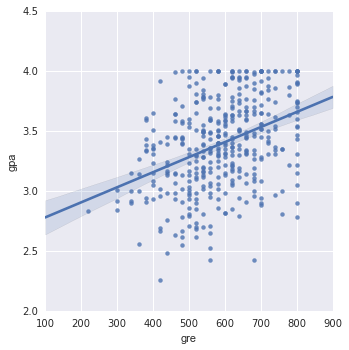

In [108]:
import seaborn as sns
sns.set_style("darkgrid")

sns.lmplot('gre', 'gpa', df_new)


In [105]:
log_columns = ['gre', 'gpa']
log_df = df_new.copy()
log_df[log_columns] = log_df[log_columns].apply(np.log10)

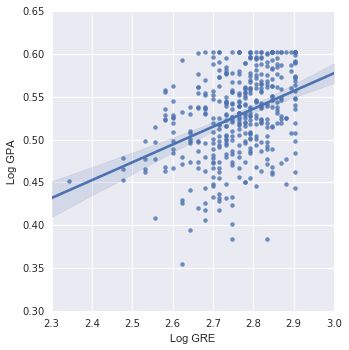

In [106]:
g = sns.lmplot('gre', 'gpa', log_df)
g.set_axis_labels( "Log GRE", "Log GPA")

#### 3. Advanced: Impute missing data

In [118]:
#infer data points based on what you do have
df_impute = df_raw.fillna(method='ffill')

In [119]:
print df_impute.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64
